In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import micasense.plotutils as plotutils
import micasense.metadata as metadata
import glob
import math
import micasense.capture as capture
import numpy as np
import time
import micasense.imageutils as imageutils
import micasense.utils as msutils
import tifffile
import micasense.dls as dls
import micasense.imageset as imageset
import exiftool
from pathlib import Path
from skimage import io

In [2]:
root_path = Path("/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment")

In [3]:
outpath = root_path / "calibrated"

In [4]:
outpath.mkdir(exist_ok=True)

In [5]:
panelNamesBefore = list(root_path.glob("IMG_0000_*.tif"))

In [6]:
panelNamesBefore = [x.as_posix() for x in panelNamesBefore]
panelNamesBefore

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_7.tif']

In [7]:
panelCapBefore = capture.Capture.from_filelist(panelNamesBefore)
panelCapBefore

In [8]:
cam_model = panelCapBefore.camera_model
cam_serial = panelCapBefore.camera_serial

In [9]:
panelNamesAfter= list(root_path.glob("IMG_0426_*.tif"))

In [10]:
panelNamesAfter = [x.as_posix() for x in panelNamesAfter]
panelNamesAfter

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_7.tif']

In [11]:
panelCapAfter = capture.Capture.from_filelist(panelNamesAfter)

In [12]:
imageNames = list(root_path.glob("IMG_*.tif"))
imageNames = imageNames[7:-7]
imageNames = [x.as_posix() for x in imageNames]

In [13]:
imageNames

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_7.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0002_5.tif',
 '/m

In [138]:
thecapture = capture.Capture.from_filelist(imageNames[-49:-42])

In [137]:
imageNames[-49:-42]

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0011_7.tif']

Manual values from the panel

In [19]:
altumPT_reflectance_by_band = [0.508, 0.509, 0.509, 0.509, 0.506, 0.5]

In [166]:
panel_radiance_before = panelCapBefore.panel_radiance()

In [167]:
ur, ul, ll, lr = panelCapBefore.images[0].panel_region

In [168]:
radiancePanelImage = panelCapBefore.images[0].radiance()

In [169]:
radiancePanelImage

array([[551.38712067, 537.26552724, 542.15377112, ..., 537.26552724,
        574.74206366, 571.48323441],
       [553.0165353 , 579.63030755, 548.12829142, ..., 547.58515321,
        551.93025888, 559.53419381],
       [570.9400962 , 566.05185232, 545.95573858, ..., 535.63611261,
        558.44791739, 546.49887679],
       ...,
       [454.70851945, 416.1457066 , 420.49081227, ...,  99.49613068,
        103.29809815, 100.03926889],
       [419.94767406, 418.86139765, 418.86139765, ..., 100.03926889,
        101.66868352,  98.40985427],
       [432.43985287, 400.93783675, 427.00847078, ...,  90.26278113,
         88.09022829,  94.6078868 ]])

In [202]:
panel_radiance_before

[995.5919394308485,
 1152.4086959532244,
 413.4168078736636,
 499.4984208130791,
 294.2924887972771,
 6627.808392508668]

In [170]:
ur, ul, ll, lr = panelCapBefore.images[0].panel_region
panelRegion = radiancePanelImage[lr[1]:ul[1], ul[0]:lr[0]]

In [171]:
panelRegion

array([[1013.59773663, 1001.64869603, 1028.26246828, ..., 1007.62321633,
        1017.3997041 , 1028.80560649],
       [ 986.98396439, 1021.20167156,  996.76045215, ..., 1029.89188291,
        1016.31342768, 1000.56241962],
       [ 989.15651722, 1016.85656589, 1012.51146022, ..., 1022.28794798,
        1014.68401305, 1011.96832201],
       ...,
       [ 995.67417573,  991.87220827,  986.44082618, ..., 1000.01928141,
         975.578062  , 1010.33890738],
       [ 979.38002946,  979.92316767,  970.1466799 , ...,  970.1466799 ,
         975.03492379,  989.15651722],
       [1013.05459843,  982.09572051,  992.41534648, ...,  998.38986678,
         965.80157423,  964.71529781]])

In [172]:
rad_to_ref = altumPT_reflectance_by_band[0] / panelRegion.mean()

In [173]:
rad_to_ref_img = rad_to_ref * radiancePanelImage

In [174]:
rad_to_ref_img

array([[0.28073928, 0.27354926, 0.27603811, ..., 0.27354926, 0.29263047,
        0.29097123],
       [0.2815689 , 0.29511932, 0.27908004, ..., 0.2788035 , 0.28101582,
        0.28488737],
       [0.2906947 , 0.28820584, 0.27797389, ..., 0.27271964, 0.28433429,
        0.27825043],
       ...,
       [0.23151528, 0.21188098, 0.2140933 , ..., 0.05065855, 0.05259433,
        0.05093509],
       [0.21381676, 0.21326368, 0.21326368, ..., 0.05093509, 0.05176471,
        0.05010547],
       [0.22017716, 0.20413788, 0.21741177, ..., 0.04595738, 0.04485122,
        0.0481697 ]])

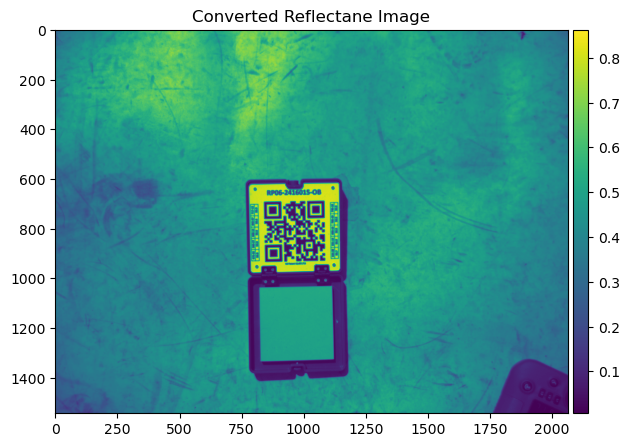

In [175]:
plotutils.plotwithcolorbar(rad_to_ref_img, 'Converted Reflectane Image');

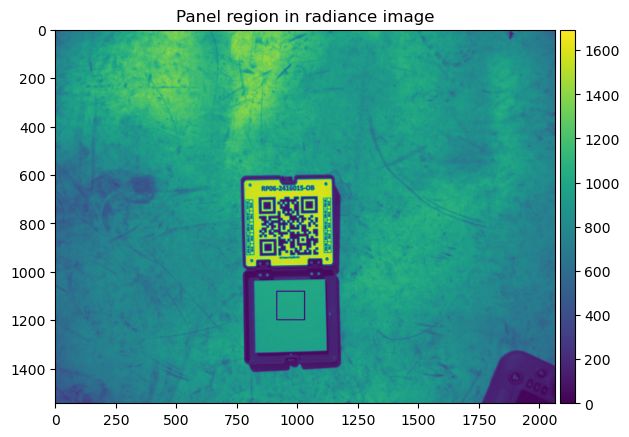

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Panel region in radiance image'}>)

In [176]:
markedImg = radiancePanelImage.copy()
cv2.rectangle(markedImg,(ul[0],ul[1]),(lr[0],lr[1]),(0,255,0),3)
plotutils.plotwithcolorbar(markedImg, 'Panel region in radiance image')

In [177]:
print('Mean Radiance in panel region: {:1.3f} W/m^2/nm/sr'.format(panelRegion.mean()))

print('Radiance to reflectance conversion factor: {:1.3f}'.format(rad_to_ref))

Mean Radiance in panel region: 997.739 W/m^2/nm/sr
Radiance to reflectance conversion factor: 0.001


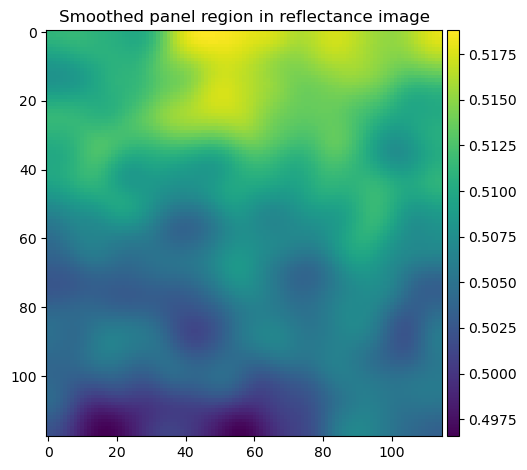

Min Reflectance in panel region: 0.47
Max Reflectance in panel region: 0.55
Mean Reflectance in panel region: 0.51
Standard deviation in region: 0.0098


In [178]:
panelRegionRaw = panelCapBefore.images[0].raw()[lr[1]:ul[1], ul[0]:lr[0]]
panelRegionRefl = rad_to_ref_img[lr[1]:ul[1], ul[0]:lr[0]]
panelRegionReflBlur = cv2.GaussianBlur(panelRegionRefl,(55,55),5)
plotutils.plotwithcolorbar(panelRegionReflBlur, 'Smoothed panel region in reflectance image')
print('Min Reflectance in panel region: {:1.2f}'.format(panelRegionRefl.min()))
print('Max Reflectance in panel region: {:1.2f}'.format(panelRegionRefl.max()))
print('Mean Reflectance in panel region: {:1.2f}'.format(panelRegionRefl.mean()))
print('Standard deviation in region: {:1.4f}'.format(panelRegionRefl.std()))

In [206]:
flightImage = plt.imread("data/altum-pt-alignment/IMG_0011_1.tif")

In [210]:
from micasense.image import Image

In [212]:
img = Image("data/altum-pt-alignment/IMG_0011_1.tif")

In [213]:
img.radiance()

array([[ 5.86480153,  8.09554775,  6.10727395, ...,  6.64071326,
         9.98683258, 11.78112845],
       [ 6.93168016,  5.62232912,  6.44673533, ...,  5.81630705,
         6.78619671,  8.87145948],
       [ 6.10727395,  5.81630705,  5.9617905 , ...,  5.57383463,
         7.85307533,  6.98017464],
       ...,
       [14.59380846, 14.15735812, 11.87811742, ..., 13.23596294,
        14.2058526 , 14.98176433],
       [13.23596294, 13.52692984, 14.06036915, ..., 11.15070017,
        13.76940225, 11.10220569],
       [18.23089469, 14.44832502, 14.2058526 , ..., 11.05371121,
        12.07209535, 10.56876638]])

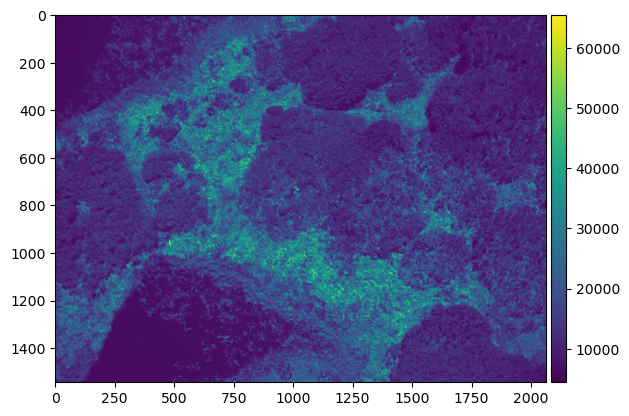

(<Figure size 640x480 with 2 Axes>, <Axes: >)

In [180]:
plotutils.plotwithcolorbar(flightImage)

In [189]:
flightRadianceImage, _, _, _ = msutils.raw_image_to_radiance(metadata.Metadata("data/altum-pt-alignment/IMG_0000_1.tif"), flightImage)

In [190]:
flightRadianceImage

array([[ 65.27842351,  90.26278113,  67.99411455, ...,  73.96863485,
        111.44517128, 131.54128502],
       [ 77.22746411,  62.56273246,  71.79608202, ...,  64.7352853 ,
         75.59804948,  98.95299247],
       [ 67.99411455,  64.7352853 ,  66.36469993, ...,  62.01959425,
         87.54709008,  77.77060232],
       ...,
       [163.04330115, 158.15505727, 132.62756144, ..., 147.8354313 ,
        158.69819548, 167.38840682],
       [147.8354313 , 151.09426055, 157.06878085, ..., 124.4804883 ,
        153.8099516 , 123.93735009],
       [203.77866683, 161.41388652, 158.69819548, ..., 123.39421188,
        134.80011428, 117.96282979]])

In [191]:
rad_to_ref

0.0005091509551962583

In [192]:
flightReflectanceImage =  flightRadianceImage * rad_to_ref

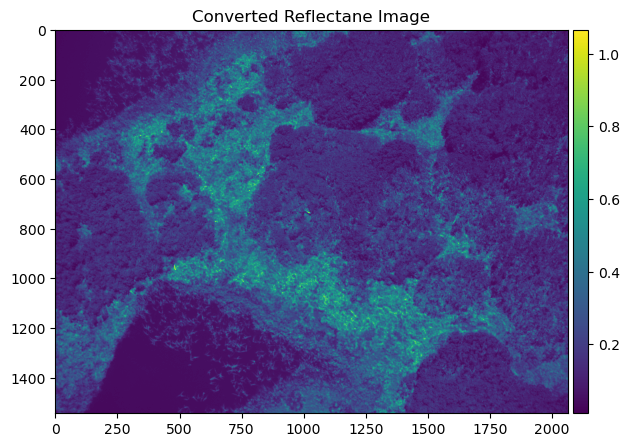

In [193]:
plotutils.plotwithcolorbar(flightReflectanceImage, 'Converted Reflectane Image');

In [ ]:
panel_reflectance_before = [x for x in panel_]

In [194]:
panel_irradiance_before = panelCapBefore.panel_irradiance(altumPT_reflectance_by_band)

In [195]:
irradiance_list = panel_irradiance_before + [0]

In [196]:
refl = thecapture.reflectance(irradiance_list)

In [197]:
panel_irradiance_before

[6156.977013561354,
 7112.767570018946,
 2551.6448064566684,
 3082.948073292873,
 1827.1682229489768,
 41643.74831061201]

In [198]:
refl

[array([[0.00299251, 0.00413075, 0.00311623, ..., 0.00338842, 0.00509577,
         0.00601131],
        [0.00353688, 0.00286879, 0.00328944, ..., 0.00296777, 0.00346265,
         0.00452666],
        [0.00311623, 0.00296777, 0.003042  , ..., 0.00284404, 0.00400703,
         0.00356163],
        ...,
        [0.00744648, 0.00722378, 0.0060608 , ..., 0.00675364, 0.00724853,
         0.00764443],
        [0.00675364, 0.00690211, 0.00717429, ..., 0.00568964, 0.00702583,
         0.00566489],
        [0.0093023 , 0.00737225, 0.00724853, ..., 0.00564015, 0.00615978,
         0.0053927 ]]),
 array([[0.00243227, 0.00279878, 0.00289873, ..., 0.00926262, 0.01096188,
         0.01226131],
        [0.00243227, 0.00253223, 0.00296537, ..., 0.00966245, 0.01096188,
         0.01189481],
        [0.00326524, 0.00273214, 0.00273214, ..., 0.00916267, 0.01092856,
         0.01386061],
        ...,
        [0.03418507, 0.03605092, 0.03811669, ..., 0.01895839, 0.01226131,
         0.01256118],
        [0.0

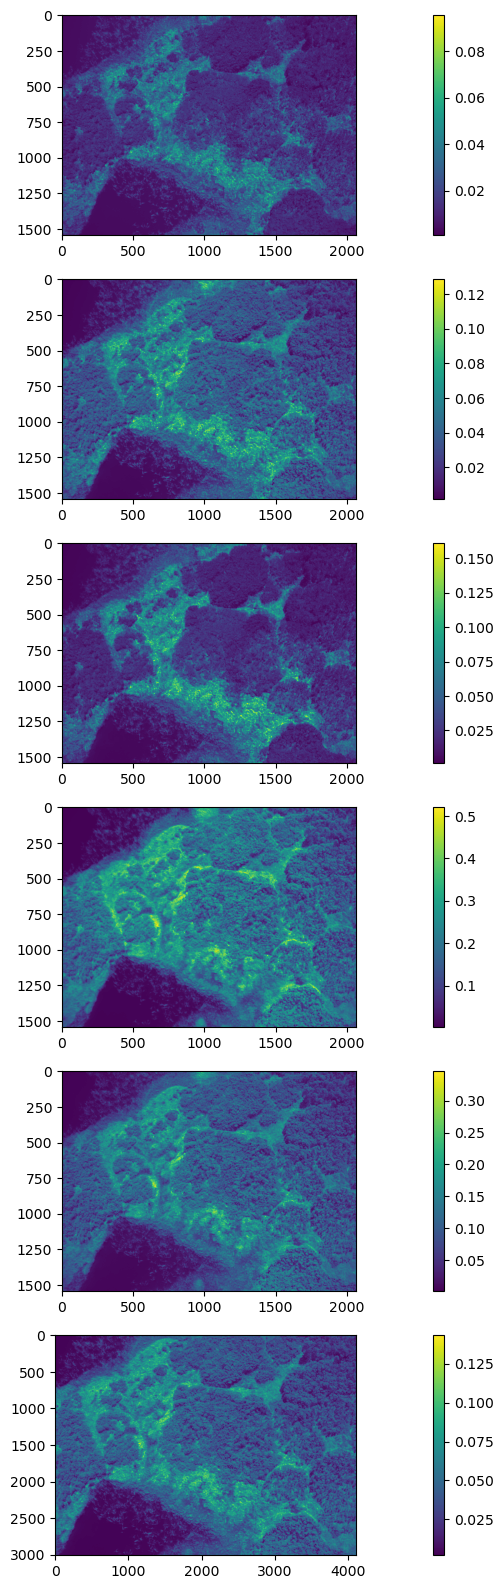

In [199]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(refl[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

In [32]:
panel_irradiance_after = panelCapAfter.panel_irradiance(altumPT_reflectance_by_band)

In [33]:
irradiance_list_After = panel_irradiance_after + [0]
reflAfter = thecapture.reflectance(irradiance_list_After)

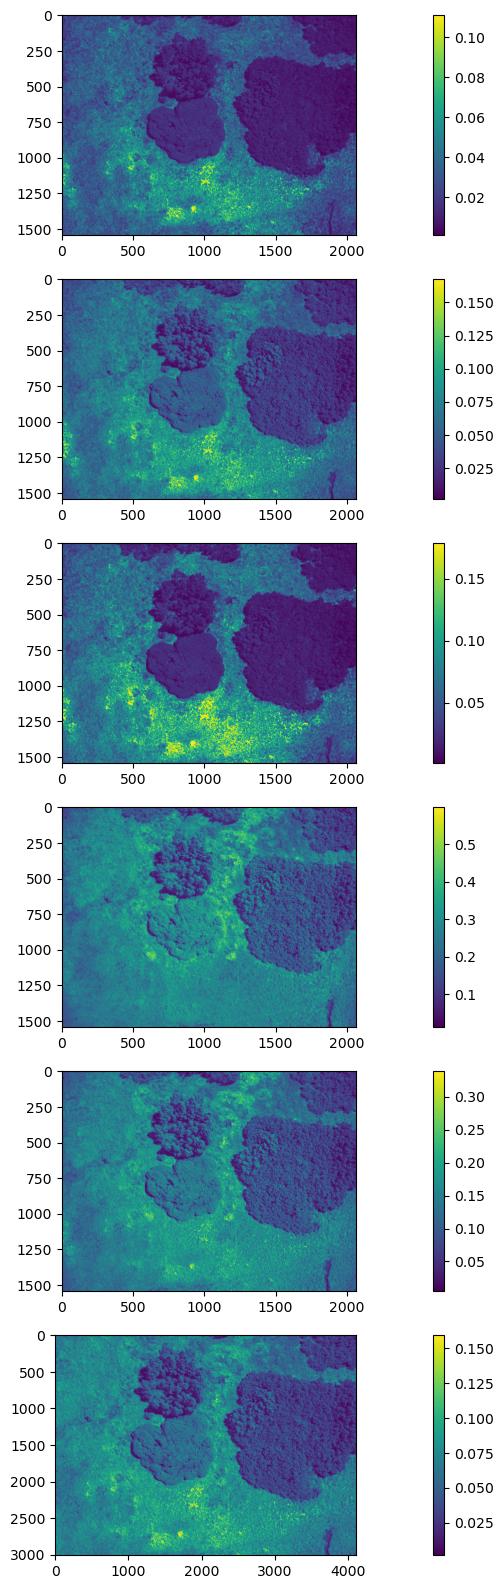

In [34]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(reflAfter[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

In [24]:
panelCapBefore.utc_time()

datetime.datetime(2025, 6, 22, 9, 15, 20, 993895, tzinfo=<UTC>)

In [25]:
panelCapAfter.utc_time()

datetime.datetime(2025, 6, 22, 9, 36, 26, 944360, tzinfo=<UTC>)

In [26]:
thecapture.utc_time()

datetime.datetime(2025, 6, 22, 9, 16, 3, 927326, tzinfo=<UTC>)

#### DLS addition

In [35]:
panelCapBefore.panel_radiance()

[995.5919394308485,
 1152.4086959532244,
 413.4168078736636,
 499.4984208130791,
 294.2924887972771,
 6627.808392508668]

In [36]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 ) = dls.compute_sun_angle(thecapture.location(), thecapture.dls_pose(), thecapture.utc_time(), np.array([0,0,-1]))

In [37]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 )

(array([-0.38784543,  0.39900705, -0.83088465]),
 array([-0.0442714 , -0.02154025, -0.99878729]),
 0.5763584099988815,
 0.9806956220863379,
 2.3420102877908477)

In [38]:
fresnel_corr = dls.fresnel(sun_sensor_angle)

In [39]:
dls_irradiances = []
cwavelengths = []
dir_dif_ratio = 6.0
for img in thecapture.images:
    percent_diffuse = 1.0/dir_dif_ratio
    sensor_irradiance = img.spectral_irradiance / fresnel_corr
    untilted_dirrect_irr = sensor_irradiance / (percent_diffuse + np.cos(sun_sensor_angle))
    dls_irr = untilted_dirrect_irr*(percent_diffuse + np.sin(solar_elevation))
    dls_irradiances.append(dls_irr)
    cwavelengths.append(img.center_wavelength)

In [40]:
cwavelengths

[475, 560, 668, 842, 717, 634.5, 11000]

In [41]:
dls_irradiances

[1.0894167288012968,
 1.0029641046516842,
 0.8915241818094788,
 0.5192849554726121,
 0.6781934192683199,
 0.8080396094514066,
 0.0]

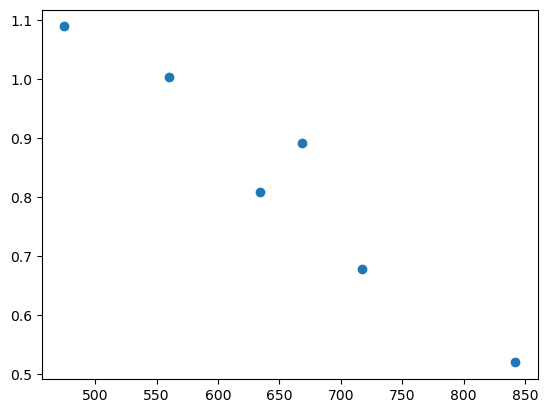

In [69]:
plt.scatter(cwavelengths[:-1], dls_irradiances[:-1])

In [42]:
panelBefore_radiances = np.array(panelCapBefore.panel_radiance())

In [43]:
irr_from_panel = math.pi * panelBefore_radiances/altumPT_reflectance_by_band

In [45]:
dls_correction = irr_from_panel/dls_irradiances[:-1]

In [46]:
dls_correction

array([ 5651.6270136 ,  7091.74689007,  2862.1150817 ,  5936.91005449,
        2694.16979144, 51536.76604899])

In [47]:
dls_irradiances

[1.0894167288012968,
 1.0029641046516842,
 0.8915241818094788,
 0.5192849554726121,
 0.6781934192683199,
 0.8080396094514066,
 0.0]

In [48]:
dls_refl = thecapture.reflectance(dls_irradiances[:-1]*dls_correction)

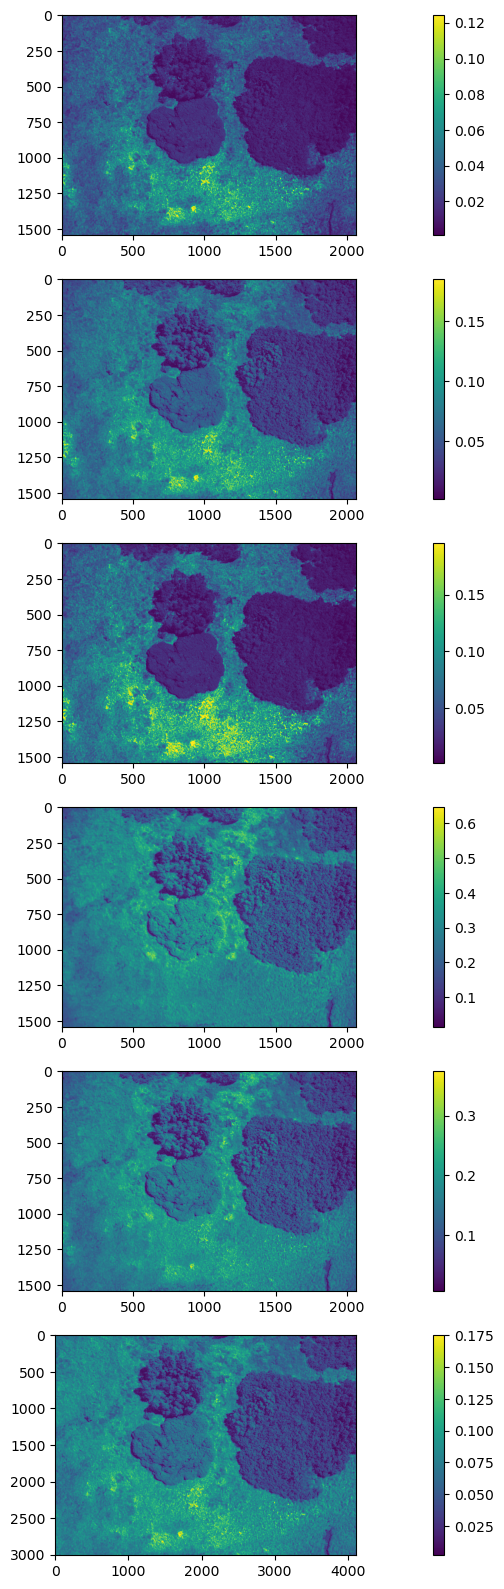

In [49]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(dls_refl[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

todo:
- interpolate between the panels
- apply dls correction

# tu to je dobre tu pod

In [14]:
allImageNames = list(root_path.glob("IMG_*.tif"))
allImageNames = allImageNames[7:-7]
allImageNames = [x.as_posix() for x in allImageNames]

In [21]:
out_paths = []

In [22]:
metadatas = []

In [23]:
for i in range(0, len(allImageNames)-1, 7):
    imgs = allImageNames[i:i+6]
    imgsCap = capture.Capture.from_filelist(imgs)
    
    #panel_irradiance_before = panelCapBefore.panel_irradiance(altumPT_reflectance_by_band)
    #irradiances_list = panel_irradiance_before + [0]
    #reflectance_imgs = imgsCap.reflectance(irradiances_list)
    #print(imgs)
    #print(reflectance_imgs)
    
    
    for b, image in enumerate(imgs):
        #exif = imgsCap.images[b].meta.get_all()[0]
        #metadatas.append(exif)
        
        radiancePanelImage = panelCapBefore.images[b].radiance()
        ur, ul, ll, lr = panelCapBefore.images[b].panel_region
        panelRegion = radiancePanelImage[lr[1]:ul[1], ul[0]:lr[0]]
        radianceReflectanceFactor = altumPT_reflectance_by_band[b] / panelRegion.mean()
        
        flightImage = plt.imread(image)
        flightRadianceImage, _, _, _ = msutils.raw_image_to_radiance(metadata.Metadata(panelNamesBefore[b]), flightImage)
        flightReflectanceImage = flightRadianceImage * radianceReflectanceFactor
        in_path = Path(imgs[b])
        #with tifffile.TiffFile(in_path) as tif:
        #    tags = thecapture.images[b].meta.get_all()[0]
        
        #print(io.imread(in_path).dtype)
        out = outpath / in_path.name
        
        tifffile.imwrite(out, flightReflectanceImage.astype("float32"))
        #io.imsave(out, image.astype("float32"))
        out_paths.append(out)
        
        lat, lon, alt =imgsCap.images[b].location
        resolution = imgsCap.images[0].focal_plane_resolution_px_per_mm
        #attitude = imgsCap.images[b].dls_pose()
        #theid = imgsCap.images[b].uuid
        #flightid = imgsCap.images[b].flightid
        focallength = imgsCap.images[b].focal_length
        latdir = 'N'
        if lat < 0:
            latdir = 'S'
        londir = 'E'
        if lon < 0:
            londir = 'W'
        exif_data = [{"Capture ID": "-"}, {"Filename": out.name}, {"Model": str(imgsCap.images[b].camera_model)},
                     {"GPSDateStamp": imgsCap.images[b].utc_time.strftime("%Y:%m:%d")},
                     {"GPSTimeStamp": imgsCap.images[b].utc_time.strftime("%H:%M:%S.%f")}, {"GPSLatitude": str(lat)},
                     {"GpsLatitudeRef": latdir}, {"GPSLongitude": str(lon)}, {"GPSLongitudeRef": londir},
                     {"GPSAltitude": str(alt) + " m Above Sea Level"}, {"GPSAltitudeRef": "0"},
                     {"FocalLength": str(focallength)}, {"XResolution": str(resolution[0])},
                     {"YResolution": str(resolution[1])}, {"ResolutionUnits": "mm"}]
        metadatas.append(exif_data)

In [39]:
metadatas[0]

[{'Capture ID': '-'},
 {'Filename': 'IMG_0001_1.tif'},
 {'Model': 'Altum-PT'},
 {'GPSDateStamp': '2025:06:22'},
 {'GPSTimeStamp': '09:16:03.927326'},
 {'GPSLatitude': '50.7342011'},
 {'GpsLatitudeRef': 'N'},
 {'GPSLongitude': '15.7053549'},
 {'GPSLongitudeRef': 'E'},
 {'GPSAltitude': '1467.156 m Above Sea Level'},
 {'GPSAltitudeRef': '0'},
 {'FocalLength': '7.919483625'},
 {'XResolution': '289.855072'},
 {'YResolution': '289.855072'},
 {'ResolutionUnits': 'mm'}]

In [53]:
overwrite = str.encode("-overwrite_original")
exif_bytes_list = []

for i, exif in enumerate(metadatas):
    filename = out_paths[i]
    #print(exif)
    for j in range(len(exif)):
        for key, val in exif[j].items():

            if key != 'Capture ID' and key != 'Filename':
                    new_value = str.encode("-" + key + "=" + val)
                    exif_bytes_list.append(new_value)
            if key == 'Filename':
                    print(val)
                    filename = outpath / val
    filename = str.encode(filename.as_posix())
    print(exif_bytes_list)
    print(filename)
    with exiftool.ExifTool() as et:
            et.execute(*exif_bytes_list, overwrite, filename)

IMG_0001_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm']
b'/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/calibrated/IMG_0001_1.tif'
IMG_0001_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.705

IMG_0002_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0002_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0003_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0003_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0003_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0004_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0004_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0004_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0004_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0005_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0005_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0005_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0005_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0005_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0005_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0006_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0006_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0006_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0006_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0006_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0006_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0007_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0007_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0007_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0007_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0007_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0007_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0008_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0008_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0008_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0008_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0008_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0008_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0009_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0009_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0009_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0009_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0009_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0009_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0010_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0010_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0010_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0010_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0010_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0010_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0011_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0011_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0011_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0011_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0011_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0011_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0012_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0012_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0012_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0012_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0012_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0012_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0013_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0013_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0013_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0013_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0013_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0013_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0014_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0014_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0014_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0014_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0014_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0014_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0015_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0015_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0015_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0015_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0015_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0015_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0016_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0016_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0016_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0016_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0016_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0016_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0017_1.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0017_2.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0017_3.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0017_4.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0017_5.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

IMG_0017_6.tif
[b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.919483625', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLength=7.905553905', b'-XResolution=289.855072', b'-YResolution=289.855072', b'-ResolutionUnits=mm', b'-Model=Altum-PT', b'-GPSDateStamp=2025:06:22', b'-GPSTimeStamp=09:16:03.927326', b'-GPSLatitude=50.7342011', b'-GpsLatitudeRef=N', b'-GPSLongitude=15.7053549', b'-GPSLongitudeRef=E', b'-GPSAltitude=1467.156 m Above Sea Level', b'-GPSAltitudeRef=0', b'-FocalLengt

In [220]:
import subprocess

In [241]:
imgsCap.images[0]

(50.7342011, 15.7053549, 1467.156)

In [226]:
subprocess.run(["exiftool", "-config", "altumconfigexif.cfg", "-tagsfromfile", f"{root_path}/%f.tif", outpath, "-all:all","-XMP:all", "-overwrite_original"])

    1 directories scanned
  119 image files updated


CompletedProcess(args=['exiftool', '-config', 'altumconfigexif.cfg', '-tagsfromfile', '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/%f.tif', PosixPath('/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/calibrated'), '-all:all', '-XMP:all', '-overwrite_original'], returncode=0)

In [89]:
a = io.imread("/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/calibrated/IMG_0017_1.tif")

In [90]:
a.dtype

dtype('float32')

In [227]:
imgsCap.images[0].meta.get_all()[0]

{'SourceFile': '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0017_1.tif',
 'ExifTool:ExifToolVersion': 13.33,
 'File:FileName': 'IMG_0017_1.tif',
 'File:Directory': '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment',
 'File:FileSize': 6381648,
 'File:FileModifyDate': '2025:06:22 09:17:14+02:00',
 'File:FileAccessDate': '2025:08:16 19:25:43+02:00',
 'File:FileInodeChangeDate': '2025:06:22 09:17:14+02:00',
 'File:FilePermissions': 100777,
 'File:FileType': 'TIFF',
 'File:FileTypeExtension': 'TIF',
 'File:MIMEType': 'image/tiff',
 'File:ExifByteOrder': 'II',
 'EXIF:SubfileType': 0,
 'EXIF:ImageWidth': 2064,
 'EXIF:ImageHeight': 1544,
 'EXIF:BitsPerSample': 16,
 'EXIF:Compression': 1,
 'EXIF:PhotometricInterpretation': 1,
 'EXIF:Make': 'MicaSense',
 'EXIF:Model': 'Altum-PT',
 'EXIF:StripOffsets': '(Binary data 119 bytes, use -b option to extract)',
 'EXIF:Orientation': 1,
 'EXIF:SamplesPerPixel': 1,
 'EXIF:RowsPerStrip': 100,
 'EXIF:StripByteCounts': '

In [109]:
refl[0]

array([[0.03053932, 0.03211835, 0.03276285, ..., 0.00801398, 0.00869071,
        0.00840068],
       [0.02551221, 0.03057155, 0.03198945, ..., 0.00562932, 0.00492037,
        0.00392139],
       [0.02638228, 0.02557666, 0.02651119, ..., 0.00359914, 0.00266461,
        0.00318021],
       ...,
       [0.03688767, 0.03157053, 0.03189278, ..., 0.01980836, 0.01826156,
        0.01929276],
       [0.03604981, 0.02995927, 0.02899252, ..., 0.02119404, 0.02170965,
        0.01764928],
       [0.03215058, 0.02954034, 0.03005595, ..., 0.02290197, 0.02219302,
        0.01787486]])